In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing data
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

y_train = df_train['label']     
X_train = df_train.drop('label',axis=1)

In [142]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

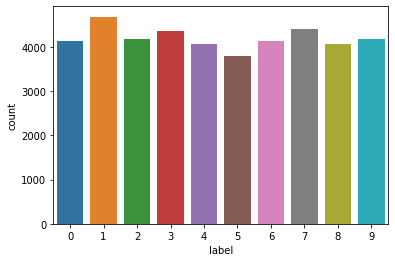

In [5]:
sns.countplot(y_train)

# dataset is balanced between all the numbers, no need to alter the distributions of the data. 

Checking for missing data

In [6]:
y_train.isnull().describe()

count     42000
unique        1
top       False
freq      42000
Name: label, dtype: object

In [7]:
X_train.isnull().describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [8]:
def scale(data):
    # Scaling the data to be between 0 and 1 since the images we're going to be working with will be grey scale
    print (type(data))
    scaled_data = data/np.max(data.values)
    print (type(scaled_data))
    return scaled_data


In [9]:
X_train = scale(X_train)
df_test = scale(df_test)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
# Reshaping data.
X_train_np = X_train.values.reshape(-1,28,28,1)

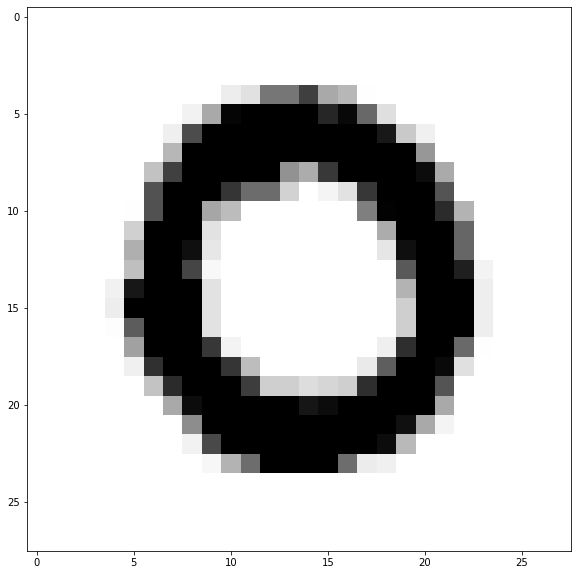

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(X_train_np[1][:,:,0],cmap='gist_gray_r')

In [12]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

In [13]:
# Generating one-hot encoding for the labels 
print(to_categorical(y_train, num_classes=10))
print(y_train)

# E.g. 2 ---> 0,0,1,0,0,0,0,0,0,0,0

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [14]:
y_train_OneHot = to_categorical(y_train,num_classes=10)

""" At this point we have: 
- X_train_np = reshaped, scaled training set 
- y_train_OneHot = one hot encoded labels for numbers between 0-10"""

In [15]:
X_train_np.shape

(42000, 28, 28, 1)

In [16]:
# For the purposes of training speeds I'm going to reduce the number of images we have by a factor of 10
X_train_samp = X_train.sample(frac=0.1,random_state=101).values.reshape(-1,28,28,1)
y_train_samp = y_train.sample(frac=0.1,random_state=101).values
y_train_samp_OneHot = to_categorical(y_train_samp,num_classes=10)
test_samp = df_test.sample(frac=0.1,random_state=101).values.reshape(-1,28,28,1)

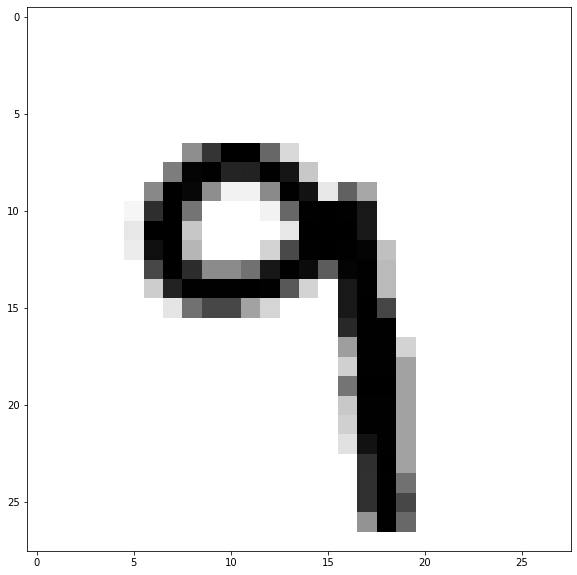

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(X_train_samp[5][:,:,0],cmap='gist_gray_r')

In [18]:
y_train_samp[5]

9

In [19]:
# -------- Perturbing our data ----------------
# Now we have the downsampled training and testing sets for our model to fit and predict on. However, to increase the number of datapoints its also important to perturb your data e.g. add noise, rotate, zoom, crop etc etc. This increases the generality of your model and reduces the likelihood of overfitting. 

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
"""# Example of all possible augmentations you can do :
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

Note: this class is used in real time, so you wont have a 'viewable' separate dataset to see. It augments it as the model is fitting in model.fit (very clever, really like this)

"""

'# Example of all possible augmentations you can do :\ntf.keras.preprocessing.image.ImageDataGenerator(\n    featurewise_center=False,\n    samplewise_center=False,\n    featurewise_std_normalization=False,\n    samplewise_std_normalization=False,\n    zca_whitening=False,\n    zca_epsilon=1e-06,\n    rotation_range=0,\n    width_shift_range=0.0,\n    height_shift_range=0.0,\n    brightness_range=None,\n    shear_range=0.0,\n    zoom_range=0.0,\n    channel_shift_range=0.0,\n    fill_mode="nearest",\n    cval=0.0,\n    horizontal_flip=False,\n    vertical_flip=False,\n    rescale=None,\n    preprocessing_function=None,\n    data_format=None,\n    validation_split=0.0,\n    dtype=None,\n)\n\nNote: this class is used in real time, so you wont have a \'viewable\' separate dataset to see. It augments it as the model is fitting in model.fit (very clever, really like this)\n\n'

In [217]:
Augmentations = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [218]:
Augmentations.fit(X_train_samp)

In [24]:
np.array(X_train_samp_Aug)

array(None, dtype=object)

In [25]:
print ("Number of samples in original training set = "+str(X_train.shape[0]))
print ("Number of samples in down-sampled training set = "+str(X_train_samp.shape[0]))

Number of samples in original training set = 42000
Number of samples in down-sampled training set = 4200


In [26]:
# -------------------------- model creation --------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,LayerNormalization,BatchNormalization

Conv2D layer params: 
- filters       - number of different filters to try convolve with input 
- kernel size   - size of filters (in pixels)
- padding       - 'same' means that output dimensions = input dimensions
                - 'valid' means no padding and output dimensions != input dimensions
- activation    - activation function

MaxPool2D params: 
- pool_size     - number of pixels overwhich the max pooling will apply to 
- strides       - amount the max pooling moves between applications (in pixels) 
- padding       - same as above 

In [135]:
def baseline_model():

    model = Sequential()

    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                    activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                    activation ='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(676,activation='relu'))
    model.add(Dense(10,activation='softmax'))

    model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

    print (model.summary())

    return model

In [137]:
model = baseline_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 676)               2120612   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [126]:
# Fitting params
val_split = 0.2
batch_size = 128
epochs = 40

In [127]:
history = model.fit(X_train_samp, y_train_samp_OneHot, batch_size = batch_size, epochs = epochs, 
                    validation_split =0.2)

Epoch 1/40
27/27 [==============================] - 3s 101ms/step - loss: 0.9647 - accuracy: 0.7161 - val_loss: 0.3571 - val_accuracy: 0.8893
Epoch 2/40
27/27 [==============================] - 3s 100ms/step - loss: 0.3469 - accuracy: 0.8860 - val_loss: 0.2810 - val_accuracy: 0.9119
Epoch 3/40
27/27 [==============================] - 2s 89ms/step - loss: 0.2412 - accuracy: 0.9262 - val_loss: 0.2128 - val_accuracy: 0.9381
Epoch 4/40
27/27 [==============================] - 2s 90ms/step - loss: 0.1845 - accuracy: 0.9435 - val_loss: 0.1826 - val_accuracy: 0.9405
Epoch 5/40
27/27 [==============================] - 2s 90ms/step - loss: 0.1393 - accuracy: 0.9586 - val_loss: 0.1511 - val_accuracy: 0.9560
Epoch 6/40
27/27 [==============================] - 2s 89ms/step - loss: 0.1049 - accuracy: 0.9685 - val_loss: 0.1386 - val_accuracy: 0.9548
Epoch 7/40
27/27 [==============================] - 2s 88ms/step - loss: 0.0794 - accuracy: 0.9774 - val_loss: 0.1280 - val_accuracy: 0.9571
Epoch 8/40


In [179]:
def add_model(global_hist,recent_hist,name): 
    """ Input :     Overall history for all models (dataframe)
                    recent model run history (dataframe)
                    name for most recent model (string)
        Output:     Overall history for all models (dataframe) 

    """
    # Removing previous run of this model from model_hist
    global_hist = global_hist[global_hist.model != name]
    recent_hist["model"] = name
    global_hist = pd.concat([global_hist,recent_hist],axis=0)

    return global_hist

In [188]:
# Creating a function to efficiently plot and compare the different models I'm testing
def compare_models(hist,models,metrics):
    """
    Input: 
        models - list of strings of which models you want to compare, default is all
        metrics - list of strings of which metrics you want to compare"""

    # If empty list passed, all models are compared
    if len(models) == 0: 
        models=list(hist["model"].unique())   
    plt.figure(figsize=(12,6))
    # Looping through all models and metrics and plotting them on the graph with appropriate labels
    for model in models:
        for m in metrics:
            y_plt = hist[(hist["model"]==model)][m].values
            x_plt = range(0,len(y_plt))
            plt.plot(x_plt,y_plt,linewidth=3,label=model+' ('+m+')')
    plt.xlabel('Epochs')
    plt.ylabel(m)
    plt.legend()

In [176]:
model_hist = pd.DataFrame(model.history.history)
model_hist["model"] = "baseline"

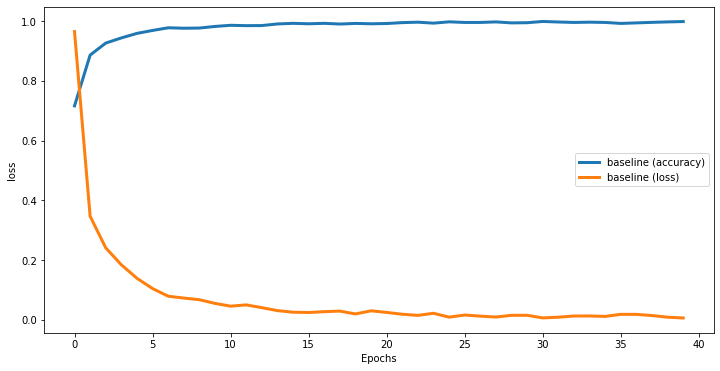

In [131]:
compare_models(['baseline'],['accuracy','loss'])

In [146]:
from sklearn.model_selection import train_test_split

In [219]:
# Need to manually extract validation data when using the augmentations since 'validation_spit' is not allowed. 
temp_X_train, X_val_Aug,temp_y_train ,y_val_Aug = train_test_split(X_train_samp,y_train_samp_OneHot,test_size=0.2,random_state=101)

In [220]:
print (X_train_samp.shape)
print (y_train_samp_OneHot.shape)
print (X_val_Aug.shape)
print (y_val_Aug.shape)

(4200, 28, 28, 1)
(4200, 10)
(840, 28, 28, 1)
(840, 10)


In [221]:
model_aug = baseline_model()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 676)               2120612   
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [222]:
hist = model_aug.fit_generator(Augmentations.flow(X_train_samp,y_train_samp_OneHot, batch_size=batch_size), 
                              steps_per_epoch=X_train_samp.shape[0] // batch_size,              
                              epochs = epochs, validation_data = (X_val_Aug,y_val_Aug))

Epoch 1/40
32/32 [==============================] - 3s 101ms/step - loss: 1.5092 - accuracy: 0.4963 - val_loss: 0.6444 - val_accuracy: 0.7893
Epoch 2/40
32/32 [==============================] - 3s 97ms/step - loss: 0.9386 - accuracy: 0.6918 - val_loss: 0.3038 - val_accuracy: 0.9286
Epoch 3/40
32/32 [==============================] - 3s 99ms/step - loss: 0.5956 - accuracy: 0.8136 - val_loss: 0.1695 - val_accuracy: 0.9643
Epoch 4/40
32/32 [==============================] - 3s 98ms/step - loss: 0.4006 - accuracy: 0.8743 - val_loss: 0.1442 - val_accuracy: 0.9595
Epoch 5/40
32/32 [==============================] - 3s 98ms/step - loss: 0.3540 - accuracy: 0.8883 - val_loss: 0.0960 - val_accuracy: 0.9750
Epoch 6/40
32/32 [==============================] - 3s 98ms/step - loss: 0.3041 - accuracy: 0.9067 - val_loss: 0.0915 - val_accuracy: 0.9762
Epoch 7/40
32/32 [==============================] - 3s 98ms/step - loss: 0.2763 - accuracy: 0.9145 - val_loss: 0.0803 - val_accuracy: 0.9821
Epoch 8/40
3

In [223]:
history = pd.DataFrame(hist.history)
model_hist = add_model(model_hist,history,'Aug')

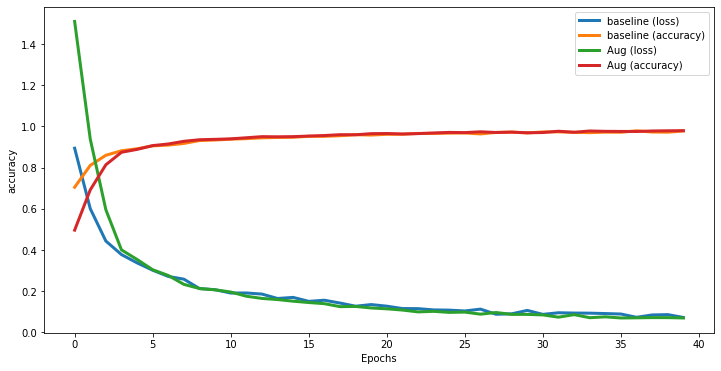

In [224]:
compare_models(hist=model_hist,models=['baseline','Aug'],metrics=['loss','accuracy'])